# **Project - Classification and Hypothesis Testing: Hotel Booking Cancellation Prediction**


## **Problem Statement**

### **Context**

**A significant number of hotel bookings are called off due to cancellations or no-shows.** Typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost. This may be beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

This pattern of cancellations of bookings impacts a hotel on various fronts:
1. **Loss of resources (revenue)** when the hotel cannot resell the room.
2. **Additional costs of distribution channels** by increasing commissions or paying for publicity to help sell these rooms.
3. **Lowering prices last minute**, so the hotel can resell a room, resulting in reducing the profit margin.
4. **Human resources to make arrangements** for the guests.

### **Objective**

This increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal - they are facing problems with this high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a Data Scientist, have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### **Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below:


**Data Dictionary**

* **Booking_ID:** Unique identifier of each booking
* **no_of_adults:** Number of adults
* **no_of_children:** Number of children
* **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:** Number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled or not.

## **Importing the libraries required**

In [92]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay

# To get diferent metric scores

from sklearn.metrics import ConfusionMatrixDisplay,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

#from sklearn.metrics import ConfusionMatrixDisplay,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer
# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [54]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [55]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Overview of the dataset**

In [56]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [57]:
data.shape

(36275, 19)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [59]:
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

### **Dropping duplicate values**

In [60]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

### **Dropping the unique values column**

**Let's drop the Booking_ID column first before we proceed forward**, as a column with unique values will have almost no predictive power for the Machine Learning problem at hand.

In [61]:
data = data.drop(["Booking_ID"], axis=1)

In [62]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [63]:
# Remove _________ and complete the code
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [64]:
# Making a list of all catrgorical variables 
cat_col=['type_of_meal_plan', 'room_type_reserved','market_segment_type', 'booking_status']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--------------------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--------------------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
--------------------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
--------------------------------------------------


## **Exploratory Data Analysis**

### **Question 3: Bivariate Analysis**

#### **Visualizing the correlation matrix using a heatmap and write your observations from the plot.**



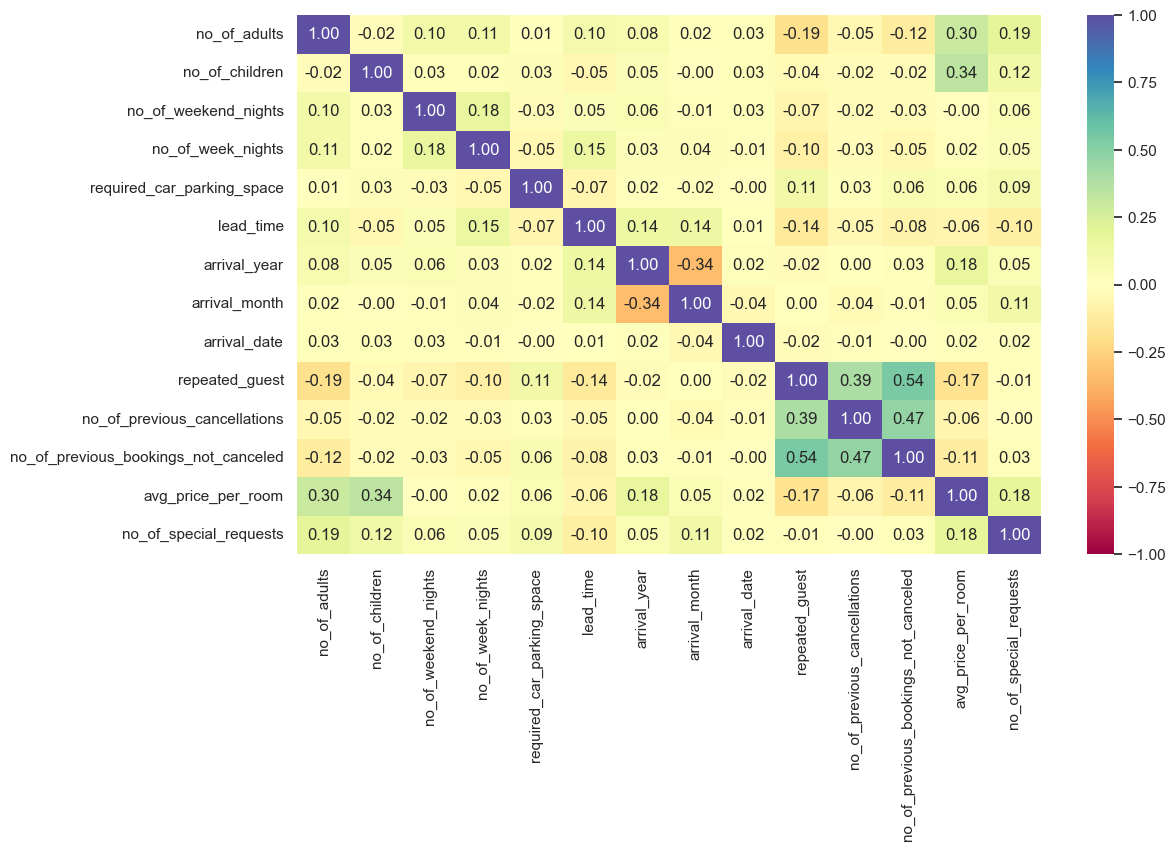

In [65]:
# Remove _________ and complete the code
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Explanaation**

Number of previous bookings that were canceled by the customer(no_of_previous_bookings_not_canceled) and repeated guest have a high postive correlation,which makes sense as repeated guests have gained a good experience with the hotels hence cancellation of bookings is expected to reduce slightly.


Average price per room and number of children have a high positive correlation,which makes sense as customers with high number of children are expected to have bookings of rooms of higher prices. 



**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

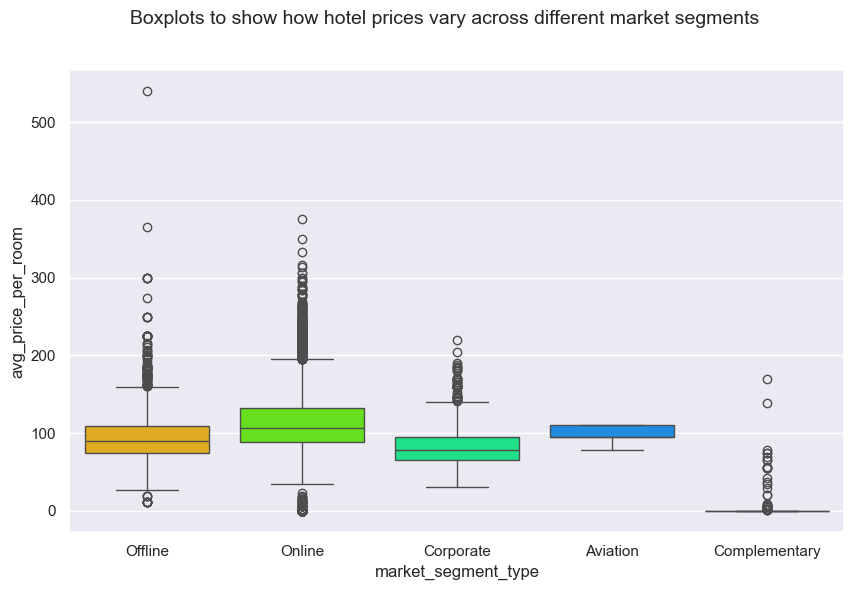

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.suptitle(f'Boxplots to show how hotel prices vary across different market segments', fontsize=14)
output_path = './figures/Boxplots of market segment.pdf'
plt.savefig(output_path, format='pdf')
plt.show()

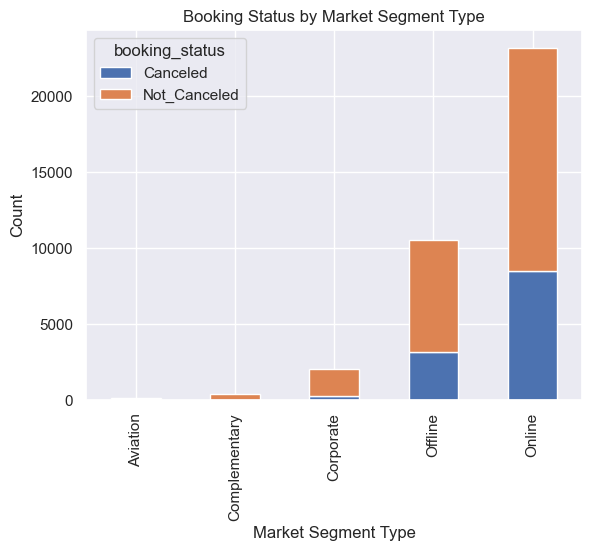

In [67]:
# Cross-tabulation
ct = pd.crosstab(data['market_segment_type'], data['booking_status'])

# Plot a stacked bar chart
ct.plot(kind='bar', stacked=True)
plt.title("Booking Status by Market Segment Type")  # Add a title here
plt.xlabel("Market Segment Type")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
output_path = './figures/Booking_status_by_market_segment.pdf'
plt.savefig(output_path, format='pdf')
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.
* From the figure below,the hotel prices are high for online market segment since it has high median charges.

We will define a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

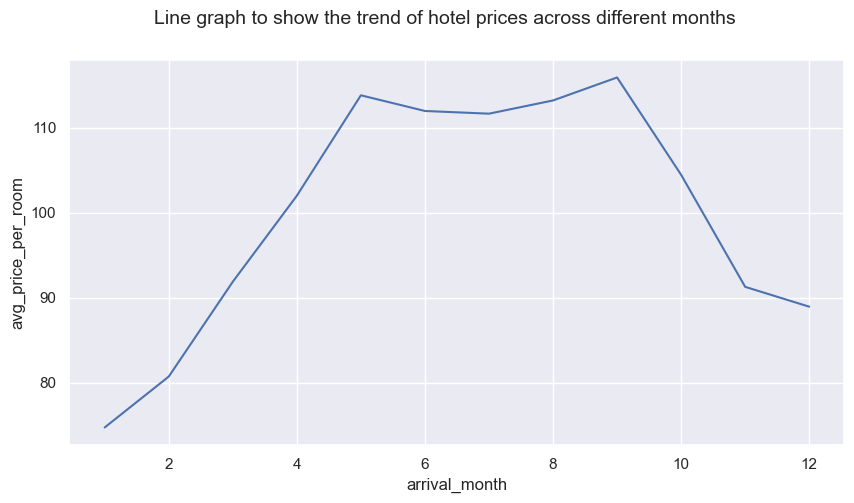

In [68]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.suptitle(f'Line graph to show the trend of hotel prices across different months', fontsize=14)
output_path = './figures/Line graph of different months.pdf'
plt.savefig(output_path, format='pdf')
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## **Data Preparation for Modeling**

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Separating the independent variables (X) and the dependent variable (Y)**

In [69]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [70]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [71]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
Not_Canceled    0.672377
Canceled        0.327623
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
Not_Canceled    0.672333
Canceled        0.327667
Name: proportion, dtype: float64


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### **Which case is more important?** 

Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage brand equity. 



#### **How to reduce the losses?**

* The hotel would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [72]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    # cm = confusion_matrix(actual, predicted)
    # plt.figure(figsize=(8,5))
    
    # sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    # plt.ylabel('Actual')
    # plt.xlabel('Predicted')
    # plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**

### **Logistic Regression**

In [73]:

# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

#### **Question 4.2: Check the performance of the model on train and test data (2 Marks)**

In [74]:

# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

    Canceled       0.73      0.60      0.66      8319
Not_Canceled       0.82      0.89      0.86     17073

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392




A predictive model is built that can be used  to predict the customers who are likely to cancel bookings with the F1 score of 65%.

Let's check the performance on the test set

In [75]:

# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

              precision    recall  f1-score   support

    Canceled       0.73      0.61      0.66      3566
Not_Canceled       0.82      0.89      0.86      7317

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.79      0.80      0.79     10883




The F1 score of the testing data still remains at 65%.

### **Support Vector Machines**

To accelerate SVM training, let's scale the data for support vector machines.

In [76]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**



In [77]:

svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

#### **Check the performance of the model on train and test data**

In [78]:

y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)


              precision    recall  f1-score   support

    Canceled       0.74      0.61      0.67      8319
Not_Canceled       0.82      0.90      0.86     17073

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.80     25392




A predictive model is built that can be used to predict the customers who are likely to cancel bookings with the F1 score of 67%.

Checking model performance on test set

In [79]:

y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

              precision    recall  f1-score   support

    Canceled       0.74      0.62      0.68      3566
Not_Canceled       0.83      0.90      0.86      7317

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883




The F1 score is noticed to still remain the same as that of the trainng data 67%, however much the precision increased slightly to 74%


#### **Build a Support Vector Machines model using an RBF kernel**

In [80]:

svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)


SVC(probability=True)

#### **Check the performance of the model on train and test data**



In [81]:

y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)


              precision    recall  f1-score   support

    Canceled       0.79      0.66      0.72      8319
Not_Canceled       0.85      0.91      0.88     17073

    accuracy                           0.83     25392
   macro avg       0.82      0.79      0.80     25392
weighted avg       0.83      0.83      0.83     25392



**Explanation**

A predictive model(Support Vector Machines model) is built that can be used to predict the customers who are likely to cancel bookings with the F1 score of 71%.

This model gives a relatively higher F1 score than the logistic regression model used previuosly

#### Checking model performance on test set

In [82]:

y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

              precision    recall  f1-score   support

    Canceled       0.78      0.65      0.71      3566
Not_Canceled       0.84      0.91      0.87      7317

    accuracy                           0.82     10883
   macro avg       0.81      0.78      0.79     10883
weighted avg       0.82      0.82      0.82     10883



### **Decision Trees**

In [83]:

model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [84]:

# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)


              precision    recall  f1-score   support

    Canceled       0.99      0.99      0.99      8319
Not_Canceled       1.00      1.00      1.00     17073

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392




Less errors on the training set.Few of the samples not classified correctly.

Model has performed very well on the training set, with the F1 score of 99%.

Let's check the performance on test data to see if the model is overfitting.

#### Checking model performance on test set

In [85]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)


              precision    recall  f1-score   support

    Canceled       0.78      0.80      0.79      3566
Not_Canceled       0.90      0.89      0.90      7317

    accuracy                           0.86     10883
   macro avg       0.84      0.85      0.84     10883
weighted avg       0.86      0.86      0.86     10883



**Explanation**

The decision tree has better performance compared to Logistic Regression and SVM models, with the F1 score of 79%.

The decision tree model is clearly overfitting.

We will have to tune the decision tree to reduce the overfitting.

### Random Forest 

In [86]:

rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)



RandomForestClassifier(random_state=1)

In [87]:

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)


              precision    recall  f1-score   support

    Canceled       1.00      0.99      0.99      8319
Not_Canceled       0.99      1.00      1.00     17073

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



**Explanation**

Less errors on the training set.Few of the samples not classified correctly.

Model has performed very well on the training set, with the F1 score of 99%.



In [89]:

y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)


              precision    recall  f1-score   support

    Canceled       0.87      0.81      0.84      3566
Not_Canceled       0.91      0.94      0.92      7317

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883



**Explanation**

The F1 score of reduces to 84%

### Conclusion and key takeaways for business recommendations



The Random forest has outperformed other models and provided balanced metrics.

Our analysis shows that single customers are more likely to cancel bookings. The company should organise more desirable rooms  to attract more such customers,since more of these customers are single.

Repeated guests are less likely to cancel out bookings since this comes with experience than the non repeated guests.

We have been able to build a predictive model that can be used by to predict the customers who are likely to cancel bookings with the F1 score of 0.84.

In [90]:
# Load the Excel file
file_path = './methods_blog.xlsx'

# Read the Excel file into a pandas DataFrame
df_logistic = pd.read_excel(file_path)

# Display the DataFrame
df_logistic

,Method,F1 Score
0,Logistic regression,0.65
1,SVM - Linear kernel,0.67
2,SVM - RBF kernel,0.71
3,Descision Tree,0.75
4,Random Forest,0.84


<Figure size 1000x2000 with 0 Axes>

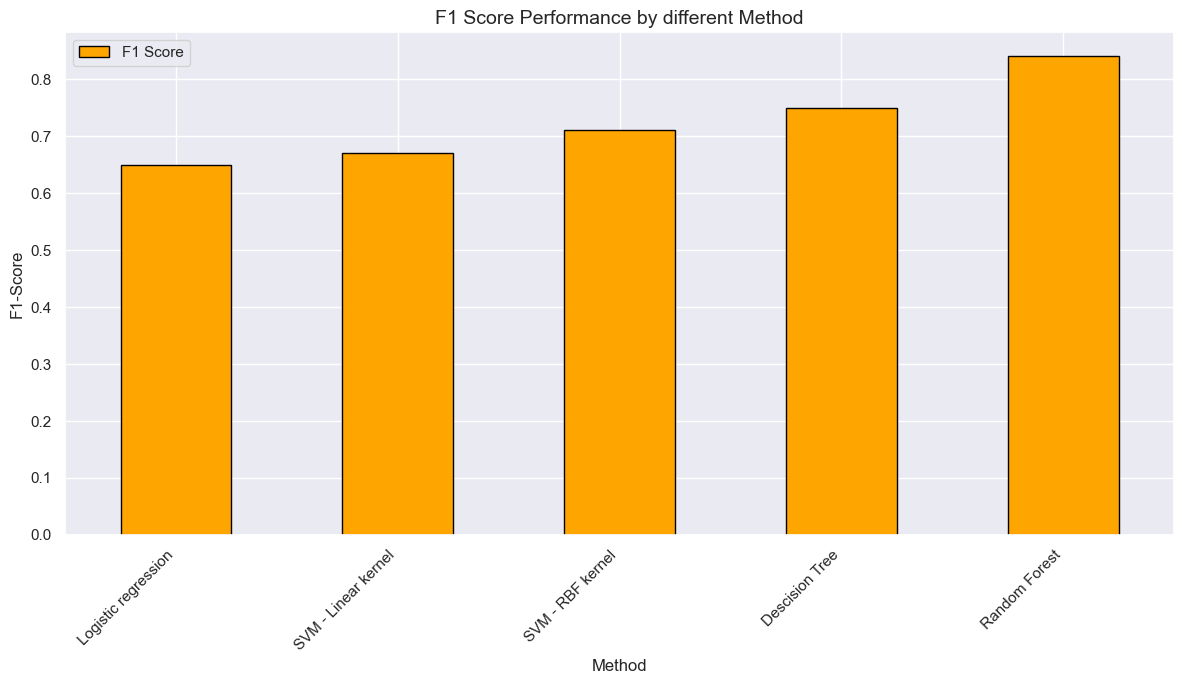

In [91]:
# Set the figure size
plt.figure(figsize=(10, 20))

# Plot Precision, Recall, and F1-score for each category
df_logistic.plot(x='Method', y=['F1 Score'], kind='bar', figsize=(12, 7), color=['orange'], edgecolor='black')

# Adding title and labels
plt.title('F1 Score Performance by different Method', fontsize=14)
plt.xlabel('Method', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('./figures/F1_score_performance.pdf', format='pdf')

# Optionally, display the plot
plt.show()